#Média Móvel Simples (SMA)

#Realizado pequenas alterações de:
https://ichi.pro/pt/gerando-sinais-de-comercio-usando-estrategia-de-crossover-de-media-movel-ma-uma-implementacao-de-python-45725080017530

#Need to run 2 times - Precisa executar essa célula 2 vezes - 

In [ ]:
import sys
!{sys.executable} -m pip install pandas_datareader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()
import pandas_datareader.data as web

ticket_empresa = "PETR4.SA" #ativos brasileiros precisam de .SA no final do ticket. Exemplo "PETR4.SA"

[*********************100%***********************]  1 of 1 completed


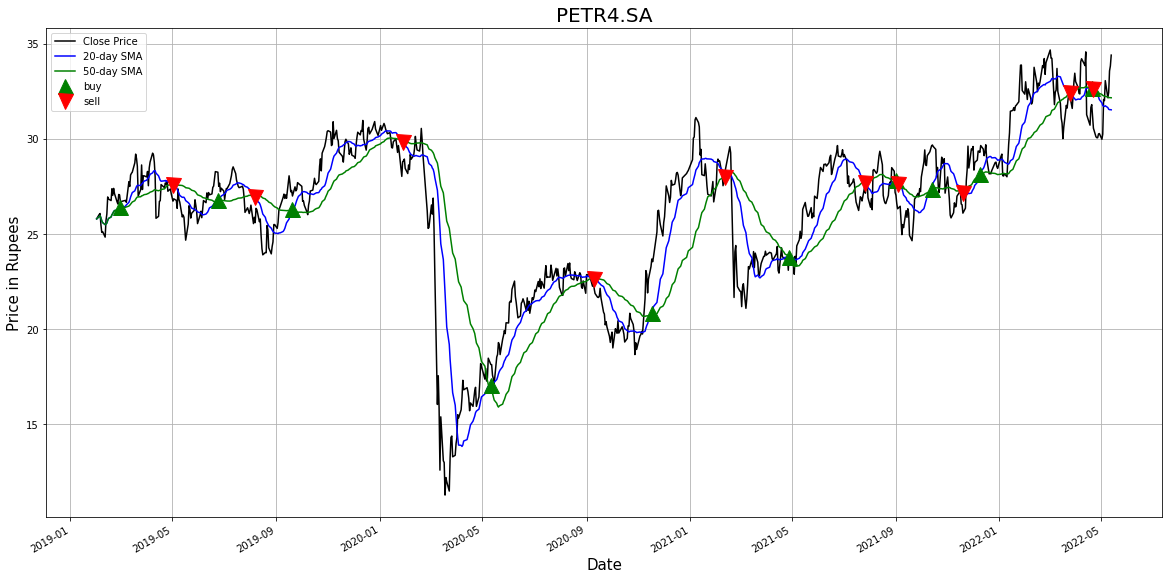

In [ ]:
# extract the closing price data
ultratech_df = web.get_data_yahoo(ticket_empresa, start="2019-02-01")["Close"].to_frame()
ultratech_df.columns = {'Close Price'}
ultratech_df.head(10)

# create 20 days simple moving average column
ultratech_df["20_SMA"] = ultratech_df['Close Price'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
ultratech_df["50_SMA"] = ultratech_df['Close Price'].rolling(window = 50, min_periods = 1).mean()

ultratech_df['Signal'] = 0.0
ultratech_df['Signal'] = np.where(ultratech_df['20_SMA'] > ultratech_df['50_SMA'], 1.0, 0.0)
ultratech_df['Position'] = ultratech_df['Signal'].diff()

plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
ultratech_df['Close Price'].plot(color = 'k', label= 'Close Price') 
ultratech_df['20_SMA'].plot(color = 'b',label = '20-day SMA') 
ultratech_df['50_SMA'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(ultratech_df[ultratech_df['Position'] == 1].index, 
         ultratech_df['20_SMA'][ultratech_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(ultratech_df[ultratech_df['Position'] == -1].index, 
         ultratech_df['20_SMA'][ultratech_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title(ticket_empresa, fontsize = 20)
plt.legend()
plt.grid()
plt.show()

##2.0 Média móvel exponencial (EMA ou EWMA)



[*********************100%***********************]  1 of 1 completed


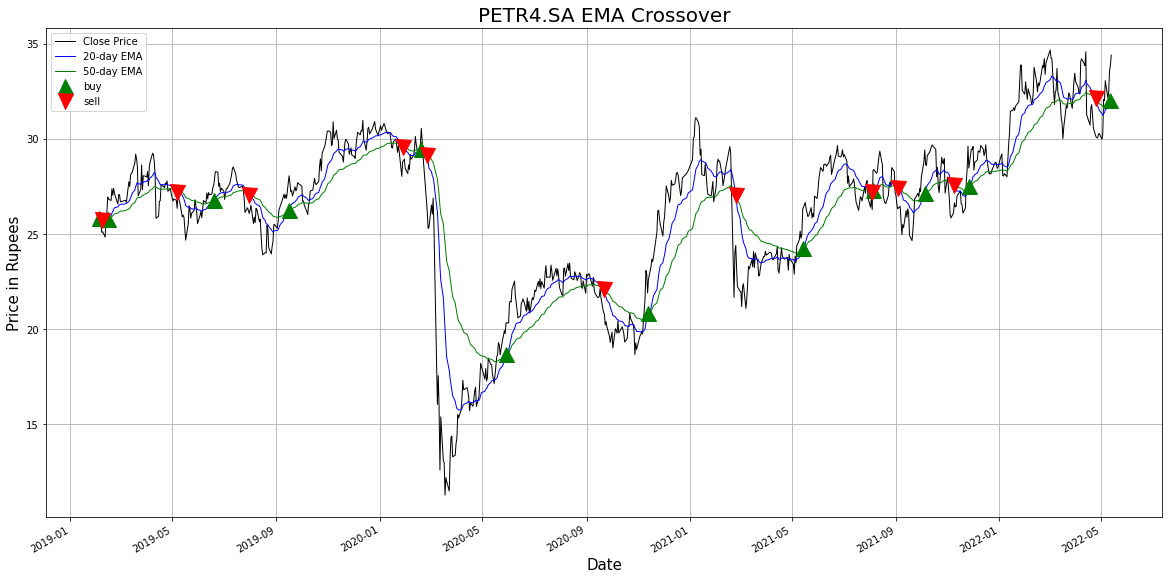

In [ ]:
# extract the daily closing price data
ultratech_df = web.get_data_yahoo(ticket_empresa, start="2019-02-01")["Close"].to_frame()
ultratech_df.columns = {'Close Price'}
# Create 20 days exponential moving average column
ultratech_df['20_EMA'] = ultratech_df['Close Price'].ewm(span = 20, adjust = False).mean()
# Create 50 days exponential moving average column
ultratech_df['50_EMA'] = ultratech_df['Close Price'].ewm(span = 50, adjust = False).mean()
# create a new column 'Signal' such that if 20-day EMA is greater   # than 50-day EMA then set Signal as 1 else 0
  
ultratech_df['Signal'] = 0.0  
ultratech_df['Signal'] = np.where(ultratech_df['20_EMA'] > ultratech_df['50_EMA'], 1.0, 0.0)
# create a new column 'Position' which is a day-to-day difference of # the 'Signal' column
ultratech_df['Position'] = ultratech_df['Signal'].diff()
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
ultratech_df['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
ultratech_df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
ultratech_df['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA')
# plot ‘buy’ and 'sell' signals
plt.plot(ultratech_df[ultratech_df['Position'] == 1].index, 
         ultratech_df['20_EMA'][ultratech_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(ultratech_df[ultratech_df['Position'] == -1].index, 
         ultratech_df['20_EMA'][ultratech_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title(ticket_empresa + " EMA Crossover", fontsize = 20)
plt.legend()
plt.grid()
plt.show()